In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib

x_train=pd.read_csv('../data/processed/preprocessed_data.csv')
x_train=x_train.drop(columns=['CustomerID'])
x_train_binary=pd.get_dummies(x_train,columns=['Gender'])
print(x_train_binary)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39          False   
1     21                  15                      81          False   
2     20                  16                       6           True   
3     23                  16                      77           True   
4     31                  17                      40           True   
..   ...                 ...                     ...            ...   
195   35                 120                      79           True   
196   45                 126                      28           True   
197   32                 126                      74          False   
198   32                 137                      18          False   
199   30                 137                      83          False   

     Gender_Male  
0           True  
1           True  
2          False  
3          False  
4          False  
..           ...  
195        Fal

In [78]:
#Building a pipeline for clustering
preprocessing=ColumnTransformer(transformers=[
    ('num',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)']),
    ('cat',OneHotEncoder(),['Gender'])
])

clustering_pipeline=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('kmeans',KMeans(n_clusters=4,random_state=42,max_iter=1000))
])

clustering_pipeline.fit(x_train)
#predicting the clusters
clusters=clustering_pipeline.predict(x_train)
x_train["clusters"]=clusters

cluster_summary=x_train.groupby("clusters")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()
print(cluster_summary)

x_train["Cluster_label"]=x_train["clusters"].map({0:"Average Income - Average Spending(old Customer)",
                                                  1:"High Income - High Spending(young customer)",
                                                  2:"Low Income - Moderate Spending(young customer)",
                                                  3:"High Income - Low Spending(Mid-aged customer)"
                                                  })

                Age  Annual Income (k$)  Spending Score (1-100)
clusters                                                       
0         53.984615           47.707692               39.969231
1         32.875000           86.100000               81.525000
2         25.438596           40.000000               60.298246
3         39.368421           86.500000               19.578947


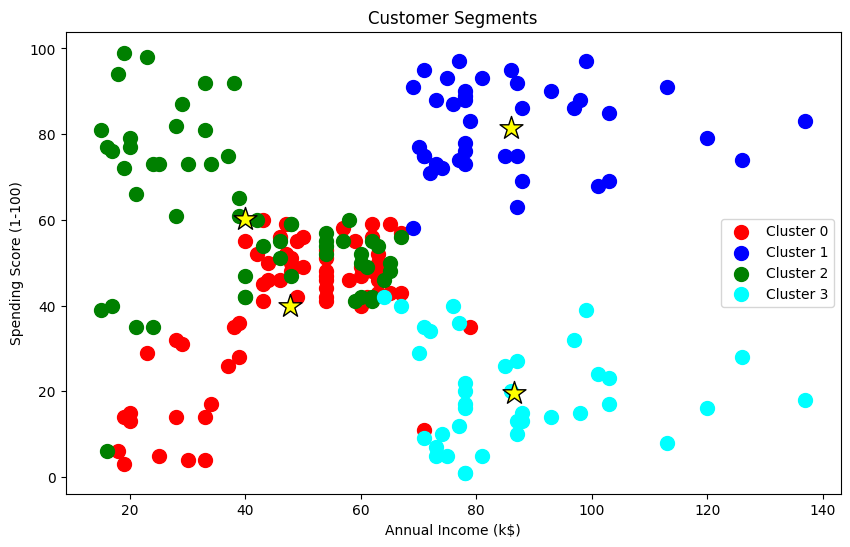

In [79]:
#visualizing the clusters
plt.figure(figsize=(10,6))

plt.scatter(x_train[x_train["clusters"]==0]["Annual Income (k$)"],x_train[x_train["clusters"]==0]["Spending Score (1-100)"],s=100,c='red',label='Cluster 0')
plt.scatter(x_train[x_train["clusters"]==1]["Annual Income (k$)"],x_train[x_train["clusters"]==1]["Spending Score (1-100)"],s=100,c='blue',label='Cluster 1')
plt.scatter(x_train[x_train["clusters"]==2]["Annual Income (k$)"],x_train[x_train["clusters"]==2]["Spending Score (1-100)"],s=100,c='green',label='Cluster 2')
plt.scatter(x_train[x_train["clusters"]==3]["Annual Income (k$)"],x_train[x_train["clusters"]==3]["Spending Score (1-100)"],s=100,c='cyan',label='Cluster 3')


centers = [
    (47.7, 39.9), 
    (86.1, 81.5),
    (40.0, 60.3),   
    (86.5, 19.6)    
]

for i, (income, spend) in enumerate(centers):
    plt.scatter(income, spend, s=300, c='yellow', marker='*', edgecolor='black')


plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [80]:
#Saving the clustered data and model
joblib.dump(clustering_pipeline,'../models/clustering_model.pkl')
x_train.to_csv('../data/processed/clustered_data.csv', index=False)